In [12]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np

Загрузка данных

In [13]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Отобразим первые 100 изображений

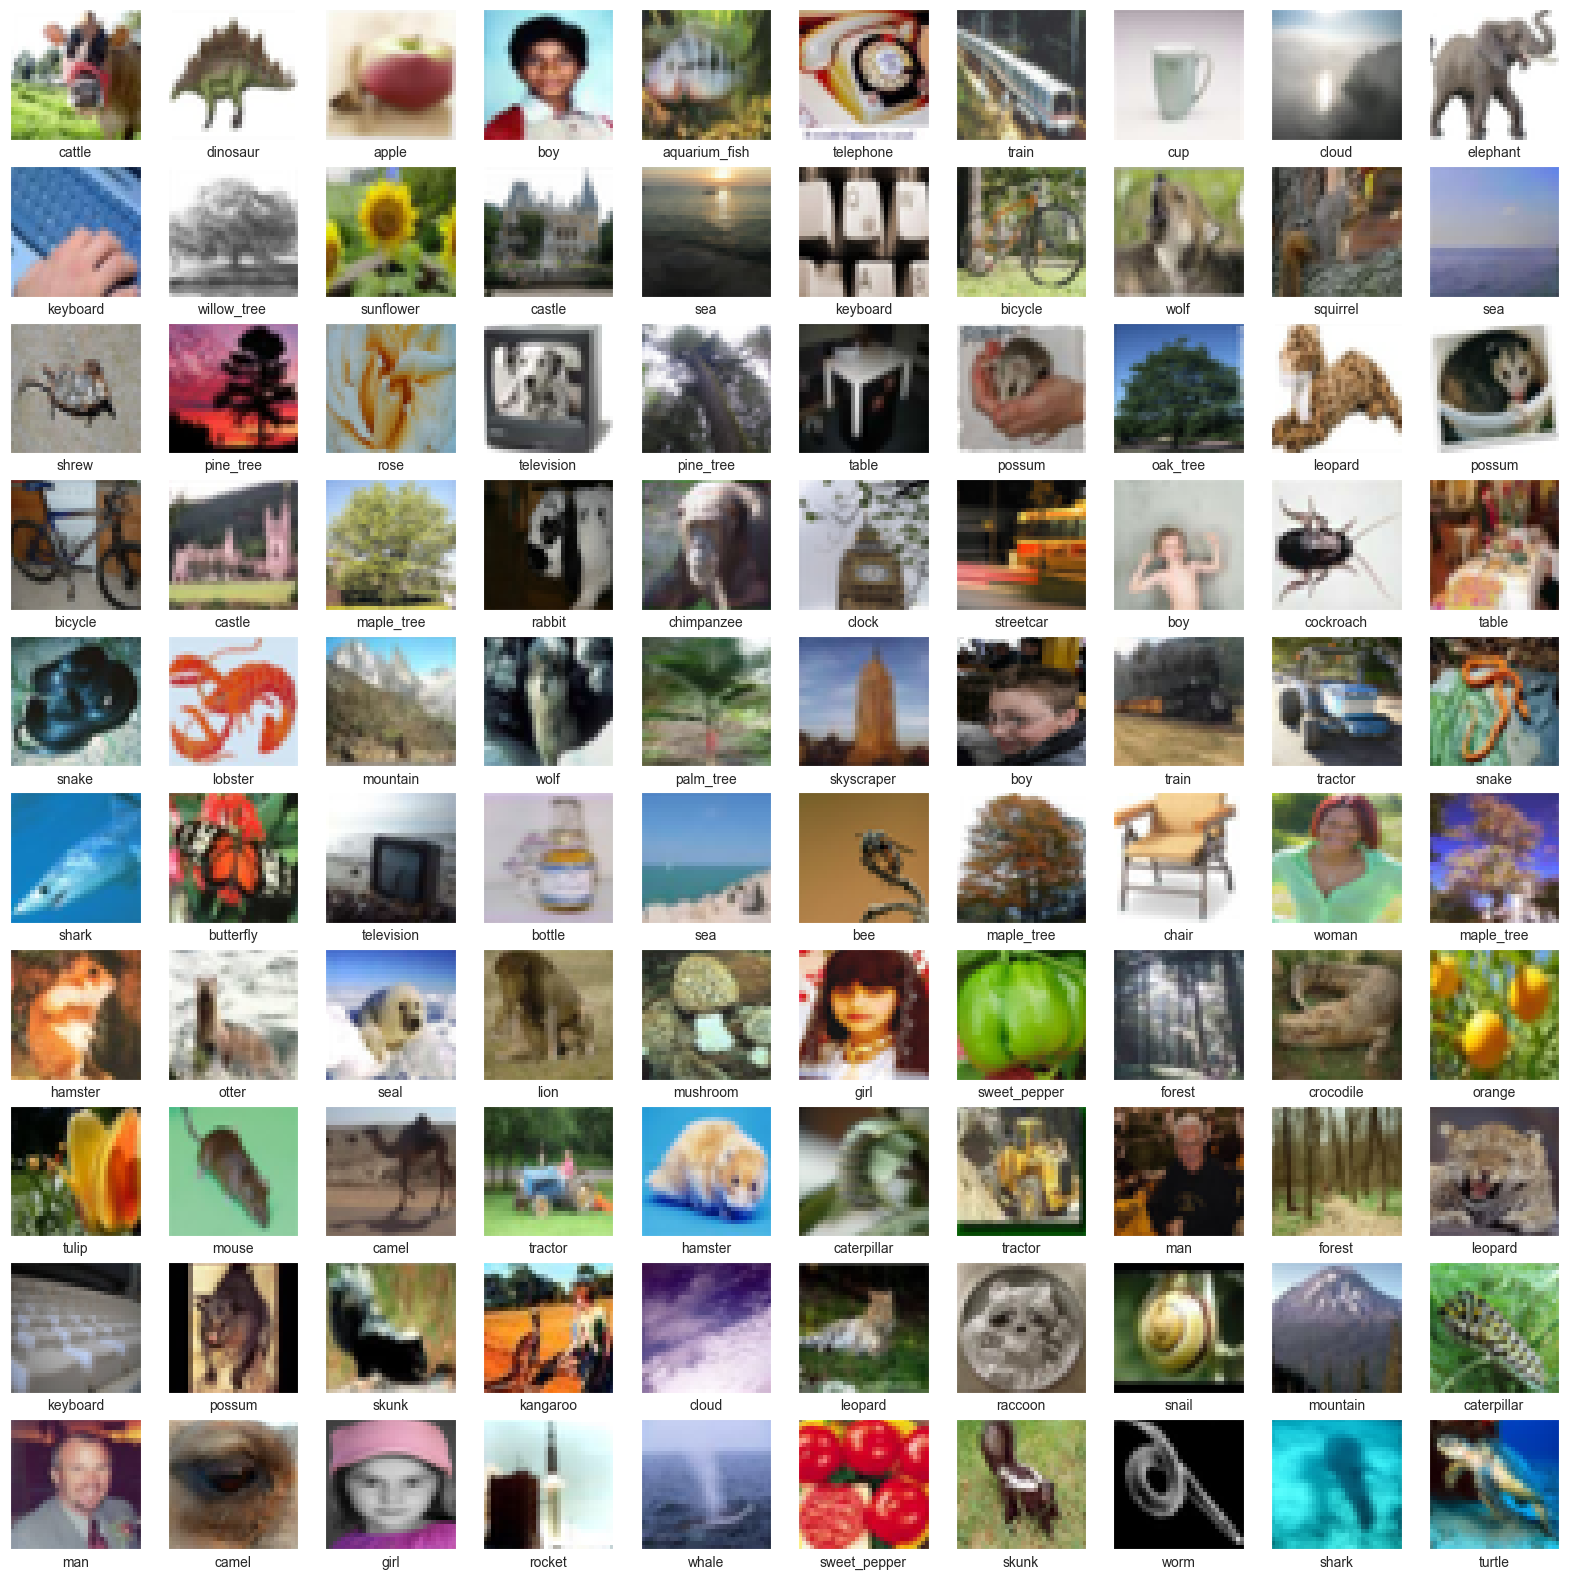

In [14]:
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 
    'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 
    'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 
    'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 
    'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 
    'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 
    'whale', 'willow_tree', 'wolf', 'woman', 'worm']

plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Сосздание свёрточной НС

In [15]:
model = models.Sequential()
model.add(layers.Input(shape = (32, 32, 3)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



Обучение модели

In [18]:
%%time
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 1986, in _run_once

  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 88, in _run

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\user\AppData\Local\Temp\ipykernel_25968\2241809416.py", line 1, in <module>

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 2541, in run_cell_magic

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\IPython\core\magics\execution.py", line 1340, in time

  File "<timed exec>", line 1, in <module>

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\keras\src\trainers\trainer.py", line 398, in _compute_loss

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\keras\src\trainers\trainer.py", line 366, in compute_loss

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\keras\src\trainers\compile_utils.py", line 618, in __call__

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\keras\src\trainers\compile_utils.py", line 659, in call

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\keras\src\losses\loss.py", line 60, in __call__

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\keras\src\losses\losses.py", line 27, in call

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\keras\src\losses\losses.py", line 1870, in sparse_categorical_crossentropy

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\keras\src\ops\nn.py", line 1559, in sparse_categorical_crossentropy

  File "D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 92 which is outside the valid range of [0, 10).  Label values: 40 25 61 47 28 42 70 74 34 74 43 59 89 10 92 30 81 9 50 88 22 54 19 66 33 78 41 84 48 82 75 29
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_3918]

оценка модели

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

NameError: name 'history' is not defined

# Улучшениее модели
+ увеличили кол-во слоёв + слой Dropout + слой нормализации


In [21]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [22]:
# One hot encoding the target class (labels)
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [23]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [24]:
# Creating a sequential model and adding layers to it

model = models.Sequential()
model.add(layers.Input(shape = (32, 32, 3)))
# model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [26]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [30]:
%%time
history = model.fit(train_images, train_labels, batch_size=64, epochs=100,
                    validation_data=(test_images, test_labels))

Epoch 1/100
 17/782 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.8640 - loss: 0.3743

KeyboardInterrupt: 

Визуализация прогресса обучения

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

In [ ]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

Предсказаниие

In [ ]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

In [ ]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)